In [97]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# geo data
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import plotly.express as px

In [86]:
# Load Data

df_minmax = pd.read_csv(r"/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/df_minmax.csv")
df_standard = pd.read_csv(r"/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/df_standard.csv")
pca4_df_standard = pd.read_csv(r"/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/pca4_df_standard.csv")
pca5_df_standard = pd.read_csv(r"/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/pca5_df_standard.csv")
data = pd.read_csv(r'/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/data.csv')

In [87]:
data_numerical = data.drop('country', axis=1)

In [88]:
data_numerical

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


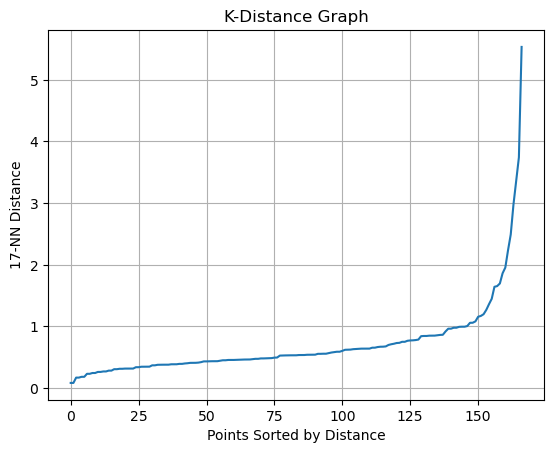

In [89]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(pca4_df_standard)
distances, indices = knn.kneighbors(pca4_df_standard)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('17-NN Distance')
plt.title('K-Distance Graph');

In [90]:
db = DBSCAN(eps = 0.9, min_samples = 8).fit(pca4_df_standard)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data_numerical['Class_DBSCAN_pca'] = labels; pca4_df_standard['Class_DBSCAN'] = labels

Number of Clusters :  3
Number of Outliers :  54


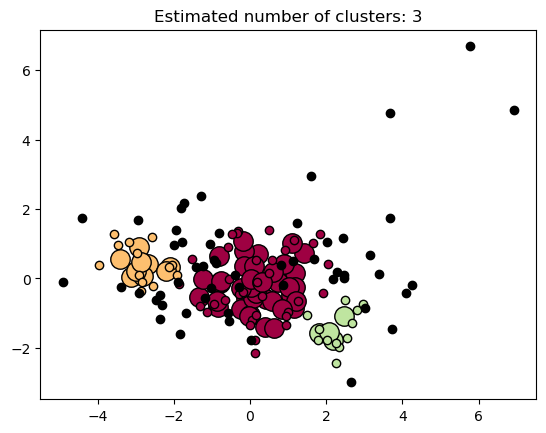

In [92]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = pca4_df_standard.to_numpy()[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = pca4_df_standard.to_numpy()[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [115]:
data_numerical

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class_DBSCAN_pca
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,-1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,-1


We again draw boxplots of income & child_mort w.r.t labelled clusters for identifying the assistance required by the nations!
We know that low income and high child mortality is a sign of an economically backward nation.

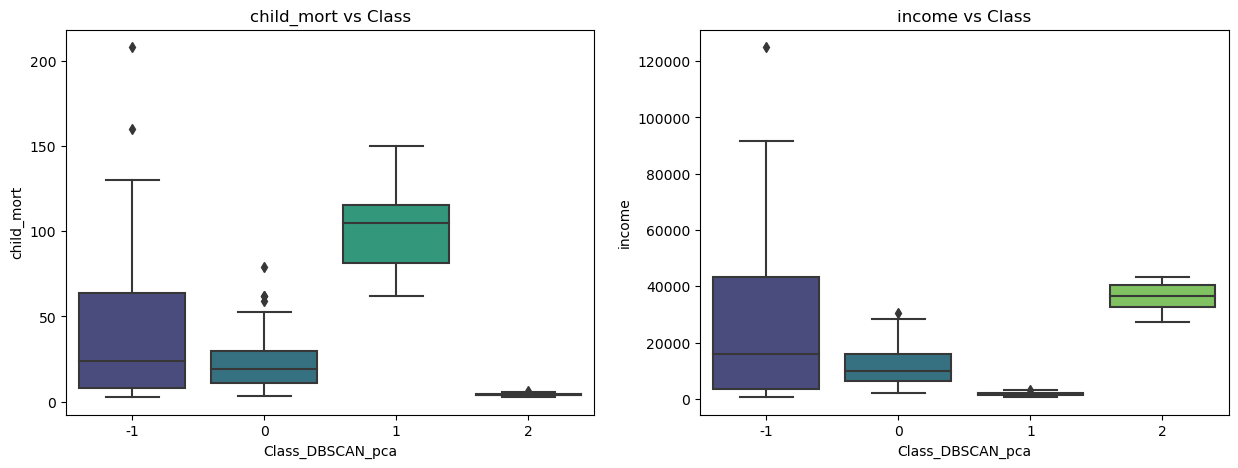

In [99]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class_DBSCAN_pca', y = 'child_mort', data  = data_numerical, palette='viridis');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class_DBSCAN_pca', y = 'income', data  = data_numerical, palette='viridis');
plt.title('income vs Class')

plt.show()

In [101]:
data['Class_DBSCAN_pca'] = labels

In [107]:
# MAP

data['Class_DBSCAN_pca'].loc[data['Class_DBSCAN_pca'] == -1] = 'Noise / Outliers'
data['Class_DBSCAN_pca'].loc[data['Class_DBSCAN_pca'] == 0] = 'Might Help Needed'
data['Class_DBSCAN_pca'].loc[data['Class_DBSCAN_pca'] == 1] = 'Need Help'
data['Class_DBSCAN_pca'].loc[data['Class_DBSCAN_pca'] == 2] ='No Help Needed'

fig = px.choropleth(data[['country','Class_DBSCAN_pca']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = data['Class_DBSCAN_pca'],  
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Might Need Help':'Yellow',
                                        'Help Needed':'Red',
                                        'No Help Needed':'Green'})

fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')